In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import Timer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

# Objective
## TODO: Let's quantify the relationships of Oura information: 

# Pre-Processing & Cleaning for Data Frame

1. Convert
2. Remove
3. TODO: NA Values??? 
    a. To Impute
    b. To remove


In [2]:
data = '../input/oura-health-data-analysis-one-year-period/oura_2019_trends.csv'

# Read CSV file into DataFrame
df = pd.read_csv(data)

# Convert 'date' to datetime format #removes unecessary column 
df['date'] = pd.to_datetime(df['date'])

# Set'date' as index column 
df.set_index('date', inplace=True)


#Sanity check
df = df.drop_duplicates()

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())


Summary statistics of numerical columns:
       average_rhr  sleep_score  activity_score  readiness_score
count   241.000000   241.000000      284.000000       267.000000
mean     60.153631    78.000000       91.186620        78.194757
std       8.047604     9.396365        7.702762        11.621841
min      45.750000    46.000000       54.000000        36.000000
25%      54.500000    73.000000       88.750000        70.000000
50%      58.650000    80.000000       93.000000        80.000000
75%      64.240000    85.000000       97.000000        87.000000
max      88.970000    98.000000      100.000000        96.000000

Missing values in the DataFrame:
average_rhr        47
sleep_score        47
activity_score      4
readiness_score    21
dtype: int64



Histograms of numerical columns:


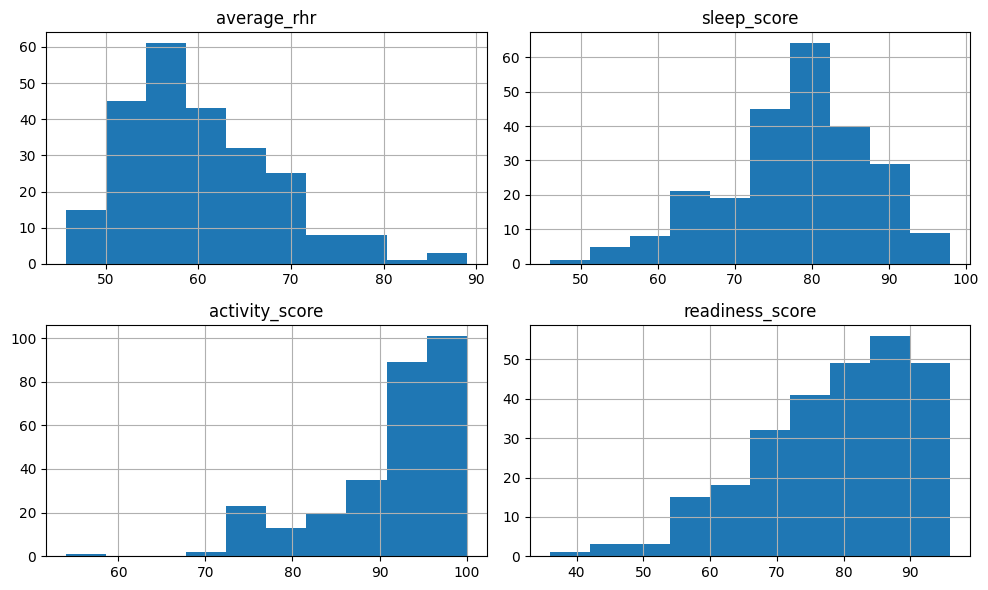


Correlation heatmap:


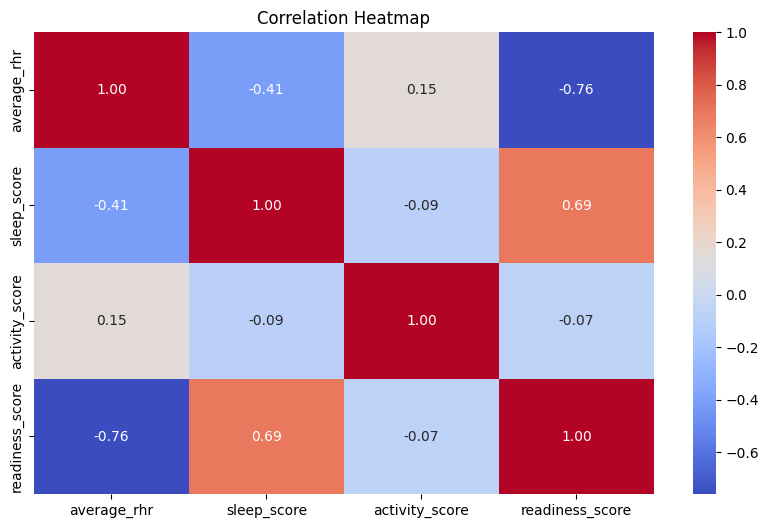

In [3]:
# Visualize the distribution of numerical columns using histograms
print("\nHistograms of numerical columns:")
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Visualize the correlation between numerical columns using a heatmap
print("\nCorrelation heatmap:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Checkmark: Cleaned CSV

In [4]:
df.to_csv('cleaned_data.csv', index=False)

## Visualizations 

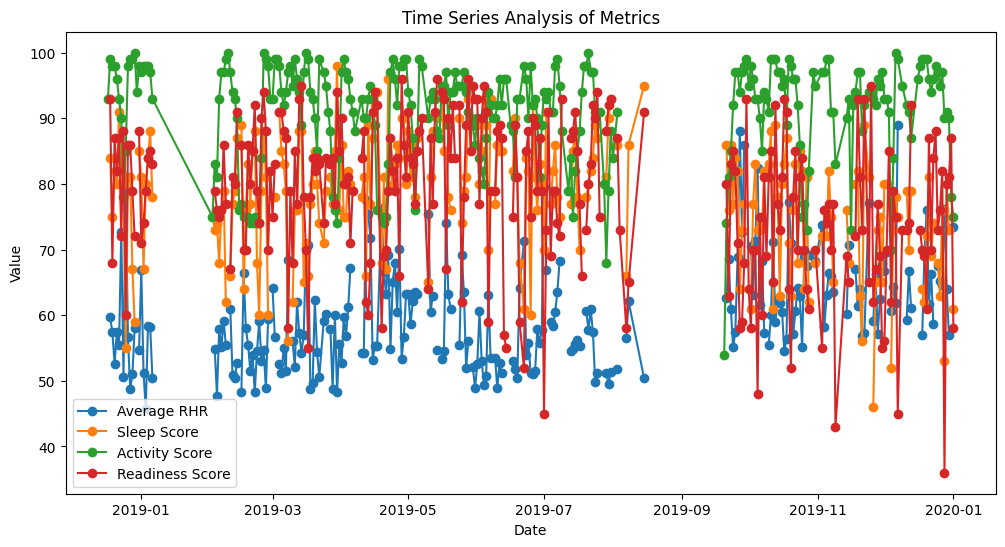

In [5]:
# 1. Line Chart
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['average_rhr'], label='Average RHR', marker='o')
plt.plot(df.index, df['sleep_score'], label='Sleep Score', marker='o')
plt.plot(df.index, df['activity_score'], label='Activity Score', marker='o')
plt.plot(df.index, df['readiness_score'], label='Readiness Score', marker='o')
plt.title('Time Series Analysis of Metrics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

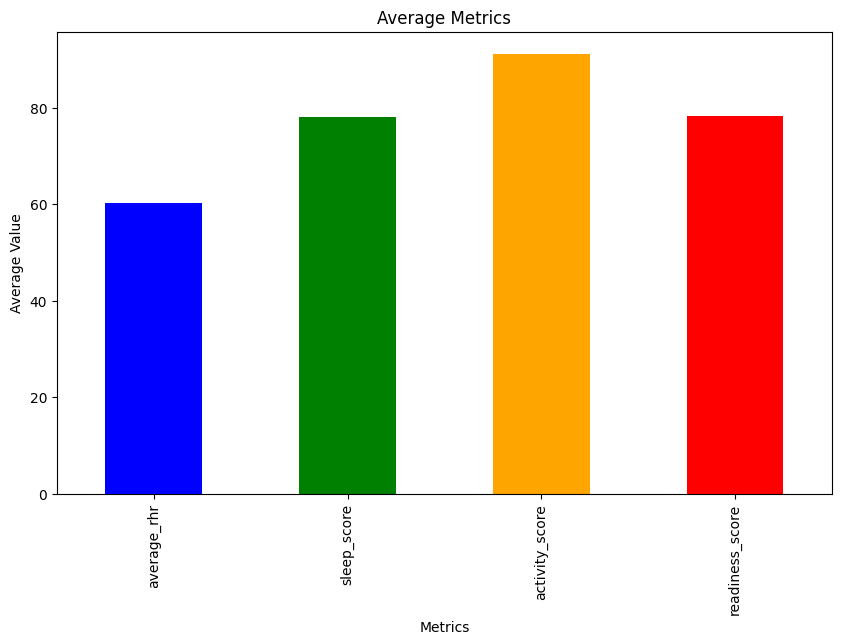

In [6]:
#2. Bar Chart
summary_stats = df[['average_rhr', 'sleep_score', 'activity_score', 'readiness_score']].mean()
summary_stats.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange', 'red'])
plt.title('Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()

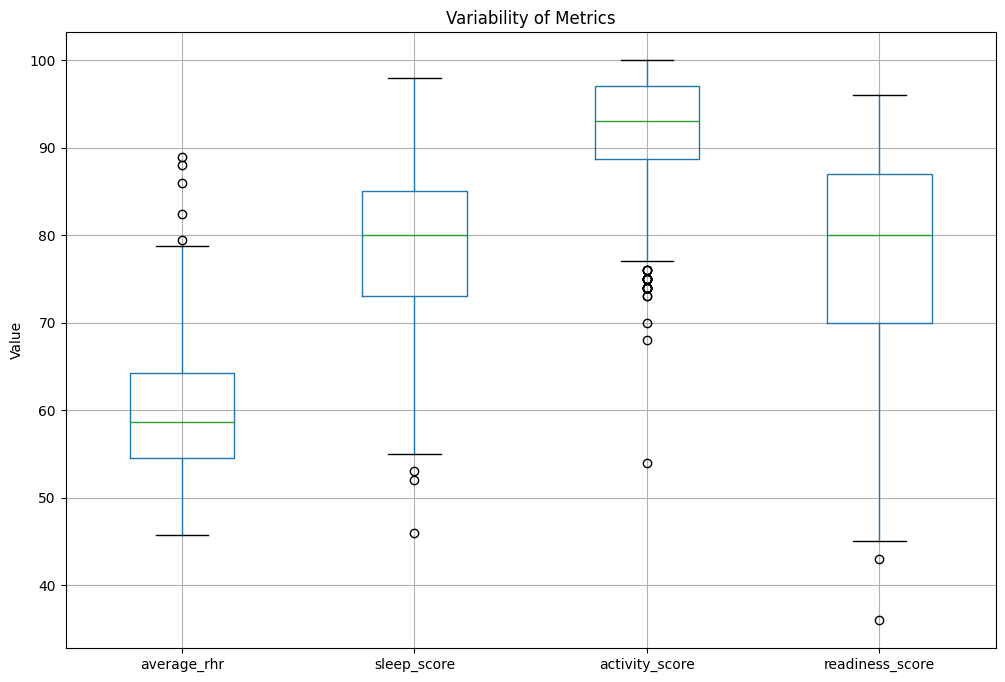

In [7]:
# 3 Box Plot - Variability
plt.figure(figsize=(12, 8))
df.boxplot(column=['average_rhr', 'sleep_score', 'activity_score', 'readiness_score'])
plt.title('Variability of Metrics')
plt.ylabel('Value')
plt.show()

# TODO: Model Linear Regression: 
Plot Average Heart Rate against Readiness

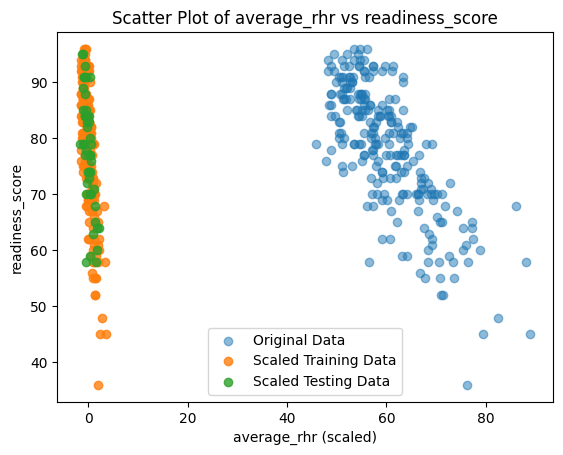

In [8]:
#TODO: Create multi-regression
# Extract features and target variable
features = ['average_rhr', 'sleep_score']
target = 'readiness_score'

X = df[features].values
y = df[target].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualization
plt.scatter(X[:, 0], y, alpha=0.5, label='Original Data')
plt.scatter(X_train_scaled[:, 0], y_train, alpha=0.8, label='Scaled Training Data')
plt.scatter(X_test_scaled[:, 0], y_test, alpha=0.8, label='Scaled Testing Data')
plt.title('Scatter Plot of average_rhr vs readiness_score')
plt.xlabel('average_rhr (scaled)')
plt.ylabel('readiness_score')
plt.legend()
plt.show()

# Sumarization